# HIV Model

Maya Laila Al-Ahmad

In [76]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# Code From Previous Chapter

In [93]:
def make_system():

    init = State(R=200, L=0, E = 0, V=100)

    t0 = 0
    t_end = 120
    dt = .3

    return System(init=init, t0=t0, t_end=t_end,
                  beta=.00027, gamma=1.36, tau = .2, mu = 0.00136, rho = .1, alpha = .036, 
                  delta = .33, pi = 100, sigma = 2, dt = dt)

In [94]:
def plot_results(R,L,E):

    plot(R, '-', label='Uninfected Lymphocytes')
    plot(L, '-', label='Latently Infected Cells')
    plot(E, '-', label='Actively Infected Cells')
    decorate(xlabel='Days From Infection',
             ylabel='Number of Cells')

In [95]:
def update_func(state, t, system):

    R, L, E, V = state

    dRdt = gamma * tau - mu*R - beta*R*V
    dLdt = rho * beta * R * V - mu * L - alpha * L
    dEdt = (1-rho)* beta * R * V + alpha * L -delta *E
    dVdt = pi * E - sigma * V
    
    R += dRdt * dt
    L += dLdt * dt
    E += dEdt * dt
    V += dVdt * dt
    
    return State(R=R, L=L, E =E, V=V)

In [96]:
def run_simulation(system, update_func):

    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [97]:
system = make_system()
results = run_simulation(system, update_func)
results.head()

,R,L,E,V
0,200,0,0,100
1,198.38,0.162,1.458,40
2,197.738,0.224459,1.89388,59.74
3,196.782,0.317628,2.56997,80.7125
4,195.497,0.442718,3.47683,109.384


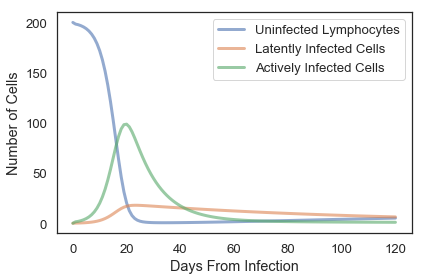

In [98]:
plot_results(results.R, results.L, results.E)